# Capstone Sprint 1:
# <b> Colon Tissue Image Classification 

## Overview 

Utilizing the MHIST dataset, as referenced in a recent publication and another available on GitHub taken from the hospital in Chaoyang, Beijing, this project's primary objective is to develop a machine learning model that can accurately identify malignancies in various colon tissue biopsies. This effort is particularly significant for researchers specializing in gastrointestinal anatomy, as it provides valuable insights with the potential to drive further research and contribute to the development of new treatments for colon-related diseases.

The initial phase of this project involves conducting basic exploratory analysis and visualization of the two datasets. Our approach, centered around the use of advanced methodologies like convolutional neural networks, aims to achieve two key goals: firstly, to significantly improve the accuracy of classifying diseased colon tissue, and secondly, to enhance our comprehension of the unique challenges and possibilities inherent in applying AI to medical image analysis. This dual focus aligns with the broader goal of harnessing AI's power to revolutionize diagnostic processes in the field of pathology. 

## Dataset

<br>The datasets comes with labeled .csv files that lables the images.

<br>[MHIST](https://bmirds.github.io/MHIST/)
<br>_Contains:_
- Test 977 images
- Train 2,175 
** is not split 

<br>[Chaoyang](https://github.com/bupt-ai-cz/HSA-NRL/?tab=readme-ov-file)
<br>_Contains:_
- Test 2,140 images 
- Train 4,022 images
** were already pre-split into seperate folders upon download

## Table of Contents
- [Dataset](#dataset)<br>
- [Setup Enviornment](#setup-enviornment)<br>
- [EDA](#exploratory-data-analysis)

## Setup Enviornment


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import tifffile
import tensorflow as tf
import os
from PIL import Image
import cv2


/Users/yukiekuang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/yukiekuang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
2024-01-12 20:05:55.196373: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Exploratory Data Analysis

First we will extract some information from the files in the Chaoyang and MHIST dataset.

Write loop that loops through files in folders utilizing the OS module

In [16]:
directory1 = '/Users/yukiekuang/Downloads/train'
# directory1 contains the train Chaoyang dataset
# Prepare an empty list to store the image data
image_data1 = []

for filename in os.listdir(directory1):
    if filename.endswith(".JPG") or filename.endswith(".png"):
        file_path = os.path.join(directory1, filename)
        
        with Image.open(file_path) as img:
            #Append a tuple of file properties to the list
            image_data1.append((filename, img.size, img.mode, img.format))

# Create a DataFrame from the list
df1 = pd.DataFrame(image_data1, columns=['Filename', 'Size', 'Mode', 'Format'])

# Print the DataFrame
print(df1)

                       Filename        Size Mode Format
0       537699-IMG010x009-0.JPG  (512, 512)  RGB   JPEG
1     540293_1-IMG016x031-2.JPG  (512, 512)  RGB   JPEG
2       535953-IMG013x006-0.JPG  (512, 512)  RGB   JPEG
3       542441-IMG024x009-2.JPG  (512, 512)  RGB   JPEG
4     543358_2-IMG012x007-1.JPG  (512, 512)  RGB   JPEG
...                         ...         ...  ...    ...
4016    538850-IMG006x037-0.JPG  (512, 512)  RGB   JPEG
4017    538377-IMG025x012-0.JPG  (512, 512)  RGB   JPEG
4018  543645_1-IMG013x019-2.JPG  (512, 512)  RGB   JPEG
4019  535997_1-IMG013x011-0.JPG  (512, 512)  RGB   JPEG
4020  539085_2-IMG017x013-2.JPG  (512, 512)  RGB   JPEG

[4021 rows x 4 columns]


In [19]:
directory2 = '/Users/yukiekuang/Downloads/test'
# directory2 contains the test Chaoyang dataset
# Prepare an empty list to store the image data
image_data2 = []

for filename in os.listdir(directory2):
    if filename.endswith(".JPG") or filename.endswith(".png"):
        file_path = os.path.join(directory2, filename)
        
        with Image.open(file_path) as img:
            # Append a tuple of file properties to the list
            image_data2.append((filename, img.size, img.mode, img.format))

# Create a DataFrame from the list
df2 = pd.DataFrame(image_data2, columns=['Filename', 'Size', 'Mode', 'Format'])

# Print the DataFrame
print(df2)

                       Filename        Size Mode Format
0     538880-3-IMG011x046-1.JPG  (512, 512)  RGB   JPEG
1     537690_1-IMG013x010-0.JPG  (512, 512)  RGB   JPEG
2     537688_2-IMG008x009-0.JPG  (512, 512)  RGB   JPEG
3     543086_1-IMG010x012-2.JPG  (512, 512)  RGB   JPEG
4       538898-IMG011x008-1.JPG  (512, 512)  RGB   JPEG
...                         ...         ...  ...    ...
2134    541831-IMG035x022-2.JPG  (512, 512)  RGB   JPEG
2135  543086_1-IMG008x022-2.JPG  (512, 512)  RGB   JPEG
2136  538842_1-IMG006x004-0.JPG  (512, 512)  RGB   JPEG
2137  543086_1-IMG024x020-2.JPG  (512, 512)  RGB   JPEG
2138  538880-3-IMG024x051-3.JPG  (512, 512)  RGB   JPEG

[2139 rows x 4 columns]


In [21]:
directory3 = '/Users/yukiekuang/Downloads/images'
# directory3 contains the MHIST dataset
# Prepare an empty list to store the image data
image_data3 = []

for filename in os.listdir(directory3):
    if filename.endswith(".JPG") or filename.endswith(".png"):
        file_path = os.path.join(directory3, filename)
        
        with Image.open(file_path) as img:
            # Append a tuple of file properties to the list
            image_data3.append((filename, img.size, img.mode, img.format))

# Create a DataFrame from the list
df3 = pd.DataFrame(image_data3, columns=['Filename', 'Size', 'Mode', 'Format'])

# Print the DataFrame
print(df3)

           Filename        Size Mode Format
0     MHIST_djh.png  (224, 224)  RGB    PNG
1     MHIST_dis.png  (224, 224)  RGB    PNG
2     MHIST_atj.png  (224, 224)  RGB    PNG
3     MHIST_cou.png  (224, 224)  RGB    PNG
4     MHIST_awq.png  (224, 224)  RGB    PNG
...             ...         ...  ...    ...
3147  MHIST_avx.png  (224, 224)  RGB    PNG
3148  MHIST_cmg.png  (224, 224)  RGB    PNG
3149  MHIST_auc.png  (224, 224)  RGB    PNG
3150  MHIST_dhz.png  (224, 224)  RGB    PNG
3151  MHIST_dka.png  (224, 224)  RGB    PNG

[3152 rows x 4 columns]


Show a small sample of each dataset.

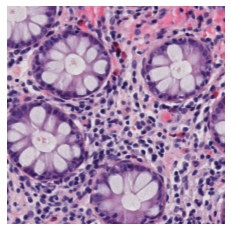

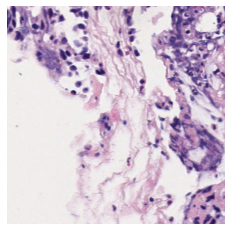

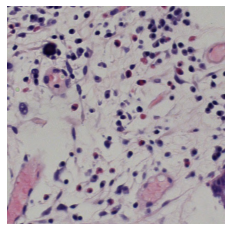

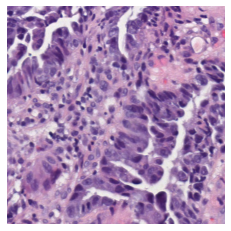

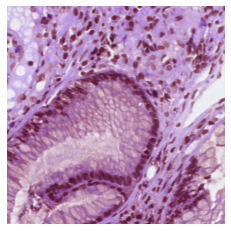

In [26]:
def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.show()

# Displaying first few images from the DataFrame
num_images_to_show = 5  # Number of images you want to display
for i in range(min(num_images_to_show, len(df1))):
    file_path = os.path.join(directory1, df1.iloc[i]['Filename'])
    display_image(file_path)

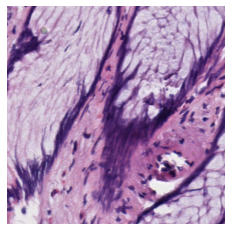

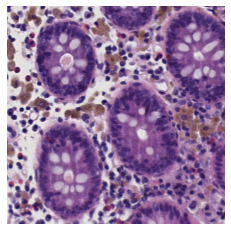

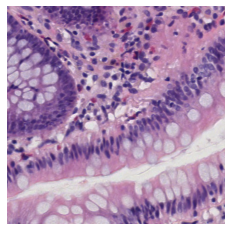

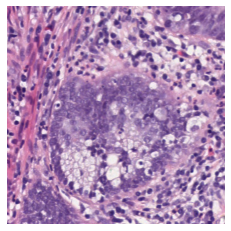

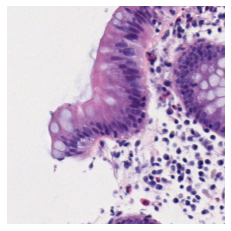

In [23]:
def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.show()

# Displaying first few images from the DataFrame
num_images_to_show = 5  # Number of images you want to display
for i in range(min(num_images_to_show, len(df2))):
    file_path = os.path.join(directory2, df2.iloc[i]['Filename'])
    display_image(file_path)

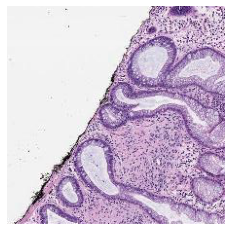

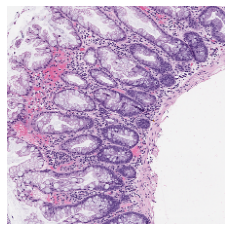

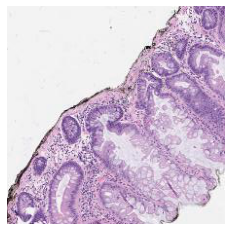

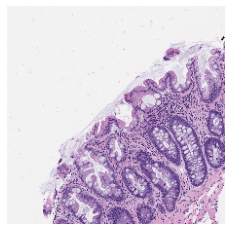

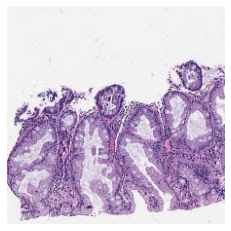

In [27]:
def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.show()

# Displaying first few images from the DataFrame
num_images_to_show = 5  # Number of images you want to display
for i in range(min(num_images_to_show, len(df3))):
    file_path = os.path.join(directory3, df3.iloc[i]['Filename'])
    display_image(file_path)